In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv("atmosphere_data1.csv")  # Importing the csv as a dataframe
df.head()

,humidity,pressure,rain,lightAvg,lightMax,moisture,temperature
0,87.64615,1027.830769,254.25,274.6232,4333,31.2385,24.06923
1,95.94805,1006.924675,339.75,14148.9787,54612,100.0000,21.20779
2,96.17143,1006.568571,38.25,134.9000,4000,93.2000,23.48571
3,98.58974,1009.415385,29.25,659.8889,4000,5.7692,21.79487
4,88.32710,991.654112,4.50,2168.3333,6295,4.2897,25.09346


In [3]:
print("The Data set has {} rows and {} columns\n".format(df.shape[0],df.shape[1]))


The Data set has 819 rows and 7 columns



In [4]:
#Y = df["temperature"]
#X = df[["pressure","humidity"]]

In [ ]:
Y = df["temperature"]
X = df[["pressure","humidity"]]

In [14]:
corr, _ = pearsonr(df["temperature"], df["pressure"]) #Finding the Pearson's correlation between Temperature and Pressure
print(corr,_)

-0.5862511816495382 9.236763310931887e-77


In [15]:
corr1, corr2 = pearsonr(df["temperature"], df["humidity"]) #Finding the Pearson's correlation between Temperature and Humidity
print(corr1, corr2)

0.3204203494722766 5.2069742591033115e-21


In [6]:

#Predictor
[X_train, X_test, Y_train, Y_test] = train_test_split(X, Y,test_size=0.3, random_state=42,shuffle=True)

X_train = np.array(X_train)
print(X_train.shape)
X_train = X_train.reshape(-1,2)  #X_train.reshape(661,1)

X_test = np.array(X_test)
X_test = X_test.reshape(-1,2)
Y_train = np.array(Y_train)
Y_train = Y_train.reshape(-1,1)
print(Y_train.shape)

(573, 2)
(573, 1)


In [7]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)
y_pred_train = regressor.predict(X_train)
print(X_test.shape)
y_pred_test = regressor.predict(X_test)

(246, 2)


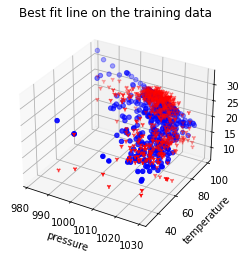

In [8]:
ax = plt.axes(projection ="3d")
ax.scatter(X_train[:,0],X_train[:,1],Y_train,marker = "1", c = "red")
ax.scatter(X_train[:,0],X_train[:,1],y_pred_train,c= "blue" )  # Predicted temperature
plt.xlabel("pressure")
plt.ylabel("humidity")
plt.ylabel("temperature")
plt.title("Best fit line on the training data")
plt.show()

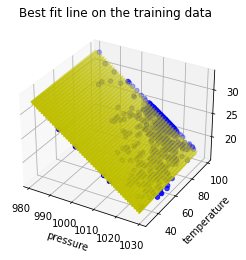

In [9]:
# To visualize the plain learned by the model
Z1 = np.empty((0,2))
for pr in range(int(X_train[:, 0].min()), int(X_train[:, 0].max()),1):
    for hu in range(int(X_train[:, 1].min()), int(X_train[:, 1].max()),1):
        z1 = np.array([pr,hu]).reshape(1,2)
        Z1 = np.append(Z1,z1,axis=0) # Generating 2D points 
Z = regressor.predict(Z1) # Get the model prediction for those 2D points
#print(Z1.shape)
#print(Z.shape)

ax = plt.axes(projection ="3d")
ax.scatter(Z1[:,0],Z1[:,1],Z,marker = "1", c = "y") # The plain learned by the model
ax.scatter(X_train[:,0],X_train[:,1],y_pred_train,c= "blue" )  # Predicted temperature for actual input
plt.xlabel("pressure")
plt.ylabel("humidity")
plt.ylabel("temperature")
plt.title("Best fit line on the training data")
plt.show()

In [10]:
MSE_train = mean_squared_error(Y_train,y_pred_train)
RMSE_train = np.sqrt(MSE_train)
print("RMSE TRAIN :",RMSE_train)

RMSE TRAIN : 3.408470887277492


In [11]:
MSE_test = mean_squared_error(Y_test,y_pred_test)
RMSE_test = np.sqrt(MSE_test)
print("RMSE TEST :",RMSE_test,"\n")

RMSE TEST : 2.952958772904309 



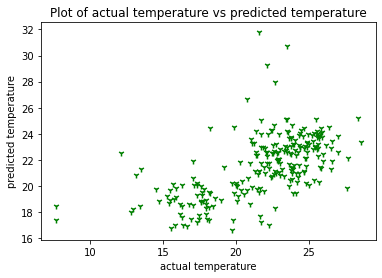

In [12]:
plt.scatter(Y_test,y_pred_test,marker = "1",color = "green")
plt.xlabel("actual temperature")
plt.ylabel("predicted temperature")
plt.title("Plot of actual temperature vs predicted temperature")
plt.show()